# imorting dependencies 

In [4]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline 

# Data reading and understanding 

In [48]:
data = pd.read_csv('supermarket_sales - Sheet1.csv')

In [49]:
data.head(5)



,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [50]:
data.nunique()

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  943
Quantity                     10
Tax 5%                      990
Total                       990
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64

In [51]:
data['Date'] = pd.to_datetime(data['Date'])

In [55]:
#remove duplicate  
un_data = data.groupby(['City'])['Time','Quantity','Total'].sum().reset_index()

<ipython-input-55-c5a23ae4463c>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  un_data = data.groupby(['City'])['Time','Quantity','Total'].sum().reset_index()


In [31]:
un_data

,Quantity,Total
City,,
Mandalay,1820,106197.6720
Naypyitaw,1831,110568.7065
Yangon,1859,106200.3705


<AxesSubplot:>

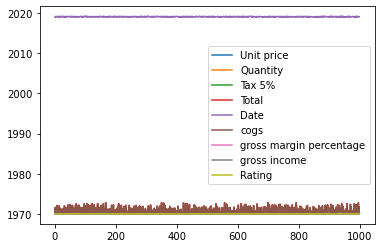

In [35]:
data.plot() 


In [20]:
data["Customer type"].nunique

<bound method IndexOpsMixin.nunique of 0      Member
1      Normal
2      Normal
3      Member
4      Normal
        ...  
995    Normal
996    Normal
997    Member
998    Normal
999    Member
Name: Customer type, Length: 1000, dtype: object>

In [12]:
data["Payment"].value_counts()

Ewallet        345
Cash           344
Credit card    311
Name: Payment, dtype: int64

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
data.shape

In [ ]:
data.isna().sum()

In [ ]:
print(data["Date"].min(),"to",data["Date"].max())

In [ ]:
print("we have",data['Customer type'].nunique(),'different customer type ,that is ',data['Customer type'].unique())

In [ ]:
print("we have",data['Product line'].nunique(),'different Product line ,that is ',data['Product line'].unique())

In [ ]:
print("we have",data['Payment'].nunique(),'different Payment type ,that is ',data['Payment'].unique())

# Exploratory data analyasis 

In [14]:
# Exploratory data analyasis using data visualization
def plot_col(col):
    print(col,'\n',data[col].value_counts())
    plt.figure(figsize=(12,6))
    sns.countplot(data = data , x= data[col].value_counts(),palette="magma")
    plt.title(f'{col.title()}')
    plt.show()   

Branch 
 A    340
B    332
C    328
Name: Branch, dtype: int64


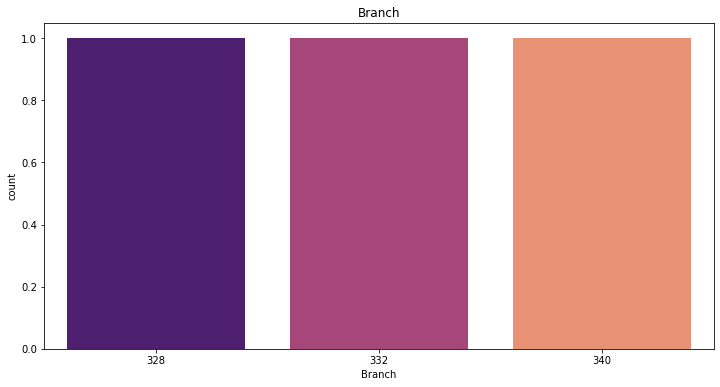

In [26]:
plot_col('Branch')

In [ ]:
plot_col('Quantity')

In [ ]:
sns.countplot(x = data['Customer type'], data = data , hue ='Gender', palette = 'magma' )

In [ ]:
plt.figure(figsize= (12,6))
sns.heatmap(round(data.corr(),1),annot=True)
plt.title("heatmap", fontsize=14,fontweight="bold")

In [ ]:
data.sample()

In [ ]:
plt.figure(figsize=(12,6))
sns.scatterplot(x= "Rating", y = "cogs",data = data )

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data= data)

In [ ]:
data.hist(figsize=(12,6))

In [ ]:
sns.pairplot(data = data)

# finding the categoical data 

In [15]:
my_listed_data = list(data.columns)

In [16]:
my_listed_data

['Invoice ID',
 'Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Tax 5%',
 'Total',
 'Date',
 'Time',
 'Payment',
 'cogs',
 'gross margin percentage',
 'gross income',
 'Rating']

In [17]:
categorical = []
for item in my_listed_data:
    if data[item].dtype == 'object':
        categorical.append(item)

In [18]:
from sklearn.preprocessing import LabelEncoder

In [22]:
lable = LabelEncoder

In [1]:
for i in categorical:
    data[i] = lable.fit_transform(data[i])

NameError: name 'categorical' is not defined

In [ ]:
data

In [ ]:
y = data["Gender"]
x = data.drop("Gender", axis = 1 ,inplace= True)

In [ ]:
y

In [24]:
data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1
